In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2020-12-15T17:00:00,8,Emilia-Romagna,2797,214,3011,61623,64634,-352,1238,...,74.0,15770.0,3838.0,-310.0,7.11,4.66,7.85,32.26,-3.60,-0.54
295,2020-12-16T17:00:00,8,Emilia-Romagna,2773,212,2985,59861,62846,-1788,1238,...,78.0,17567.0,4983.0,-1762.0,7.10,4.75,7.05,24.84,-0.93,-2.77
296,2020-12-17T17:00:00,8,Emilia-Romagna,2801,206,3007,59570,62577,-269,1667,...,78.0,14297.0,4758.0,-291.0,6.85,4.81,11.66,35.04,-2.83,-0.43
297,2020-12-18T17:00:00,8,Emilia-Romagna,2764,207,2971,59355,62326,-251,1745,...,75.0,16762.0,4662.0,-215.0,6.97,4.77,10.41,37.43,0.49,-0.40


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1641
Nuovi tamponi: 13851.0
Percentuale nuovi positivi/nuovi tamponi: 12.0 %
Nuovi guariti: 2944.0
Nuovi deceduti: 73.0
Variazione positivi ricoverati con sintomi: 55.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -1431.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,8,Emilia-Romagna,531,78,609,9559,10168,498,507,...,5.0,16549.0,5404.0,440.0,12.81,5.99,3.06,9.38,11.43,5.15
1,2020-10-21T17:00:00,8,Emilia-Romagna,596,86,682,10118,10800,632,671,...,8.0,17165.0,7815.0,559.0,12.61,6.31,3.91,8.59,10.26,6.22
2,2020-10-22T17:00:00,8,Emilia-Romagna,636,86,722,10941,11663,863,889,...,6.0,16179.0,6539.0,823.0,11.91,6.19,5.49,13.60,0.00,7.99
3,2020-10-23T17:00:00,8,Emilia-Romagna,657,86,743,11771,12514,851,888,...,10.0,15978.0,7308.0,830.0,11.57,5.94,5.56,12.15,0.00,7.30
4,2020-10-24T17:00:00,8,Emilia-Romagna,723,89,812,12830,13642,1128,1180,...,10.0,17612.0,8085.0,1059.0,10.96,5.95,6.70,14.59,3.49,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-15T17:00:00,8,Emilia-Romagna,2797,214,3011,61623,64634,-352,1238,...,74.0,15770.0,3838.0,-310.0,7.11,4.66,7.85,32.26,-3.60,-0.54
57,2020-12-16T17:00:00,8,Emilia-Romagna,2773,212,2985,59861,62846,-1788,1238,...,78.0,17567.0,4983.0,-1762.0,7.10,4.75,7.05,24.84,-0.93,-2.77
58,2020-12-17T17:00:00,8,Emilia-Romagna,2801,206,3007,59570,62577,-269,1667,...,78.0,14297.0,4758.0,-291.0,6.85,4.81,11.66,35.04,-2.83,-0.43
59,2020-12-18T17:00:00,8,Emilia-Romagna,2764,207,2971,59355,62326,-251,1745,...,75.0,16762.0,4662.0,-215.0,6.97,4.77,10.41,37.43,0.49,-0.40


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

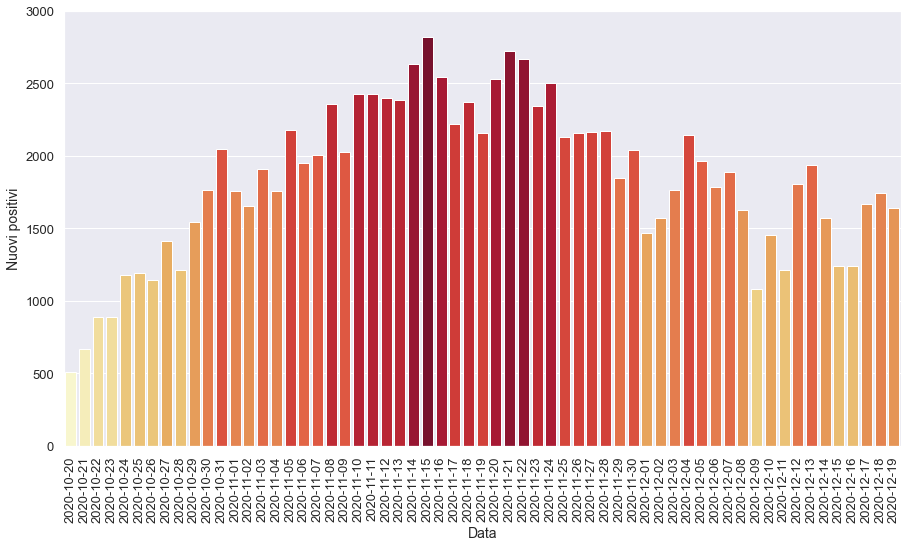

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

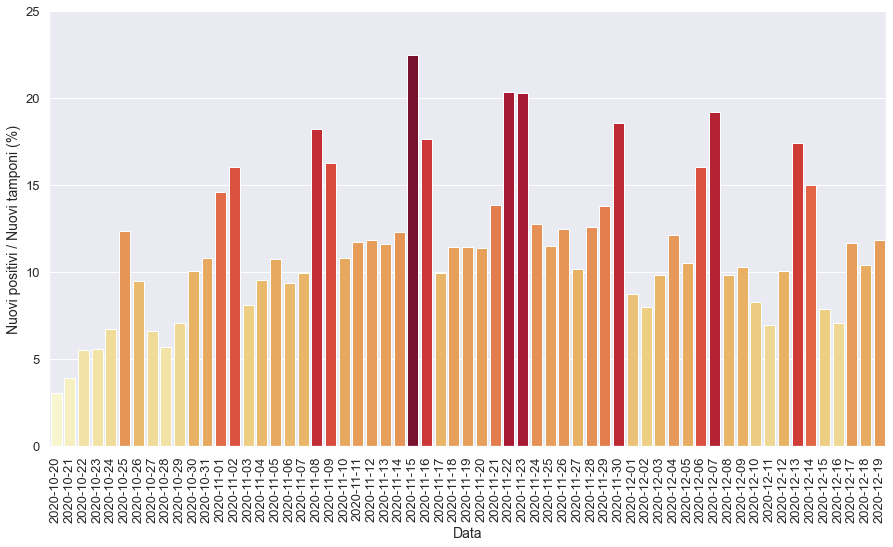

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

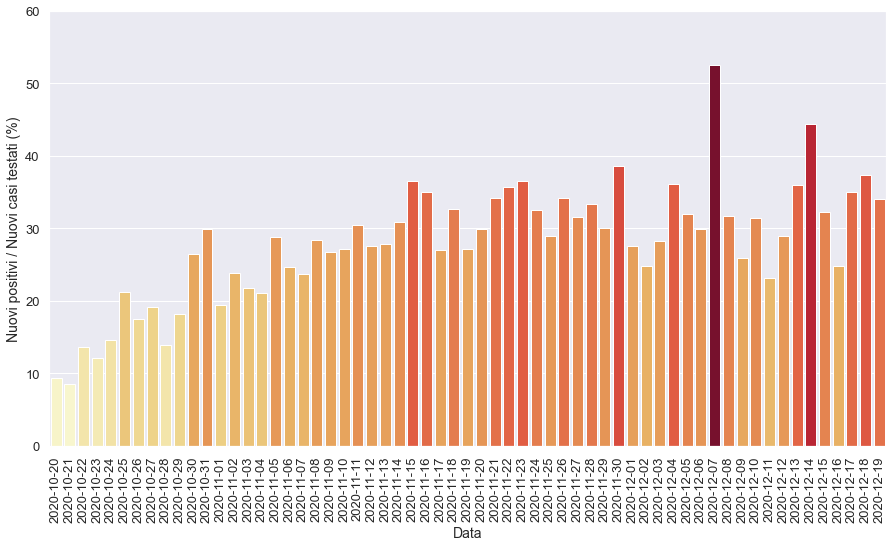

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

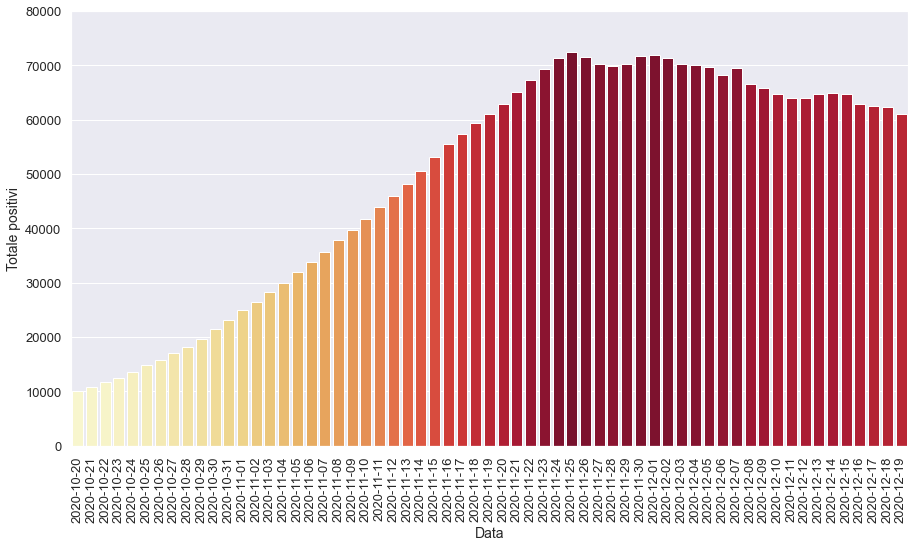

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

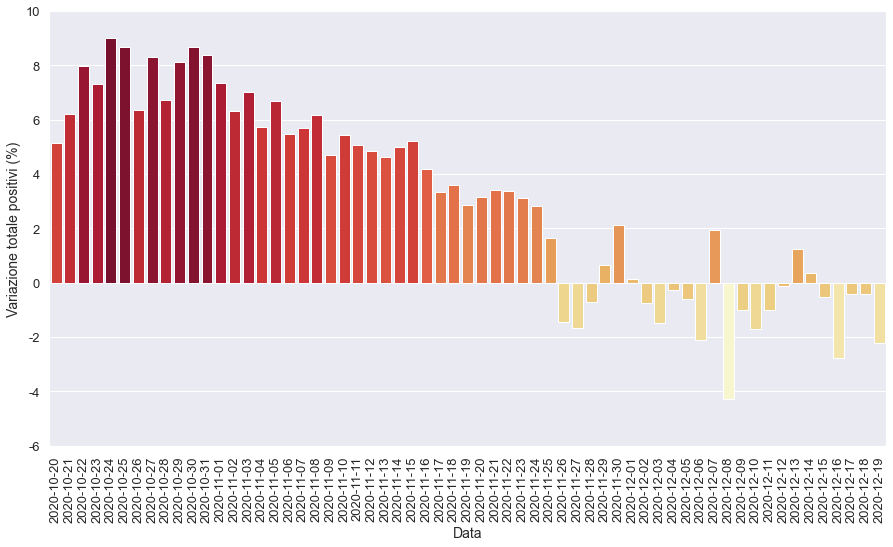

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

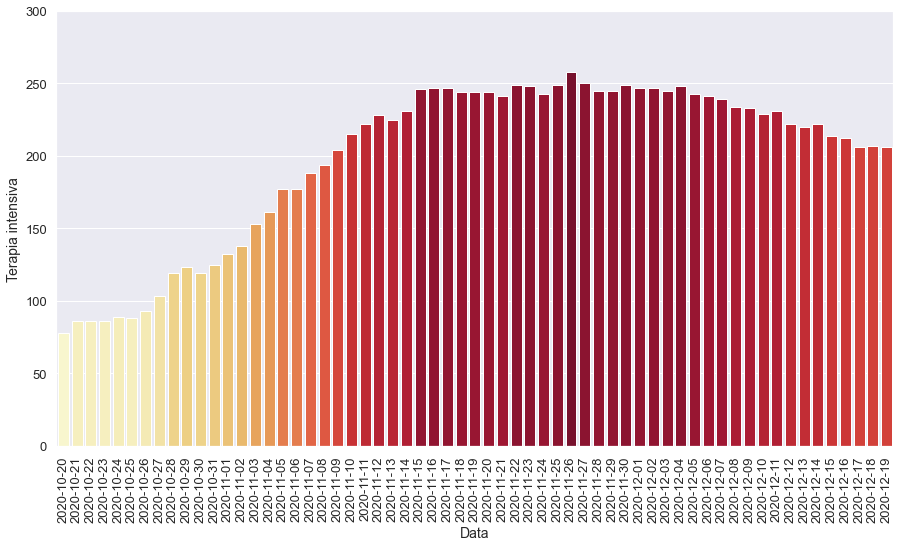

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

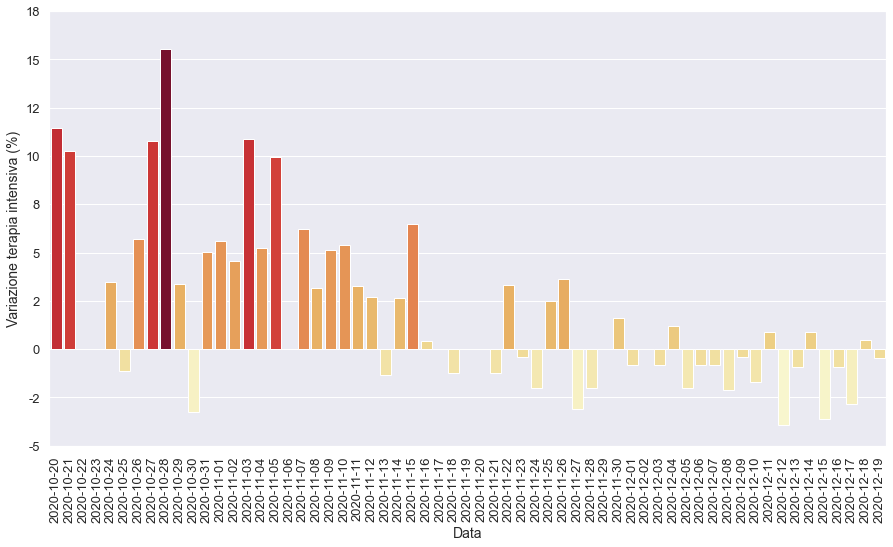

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

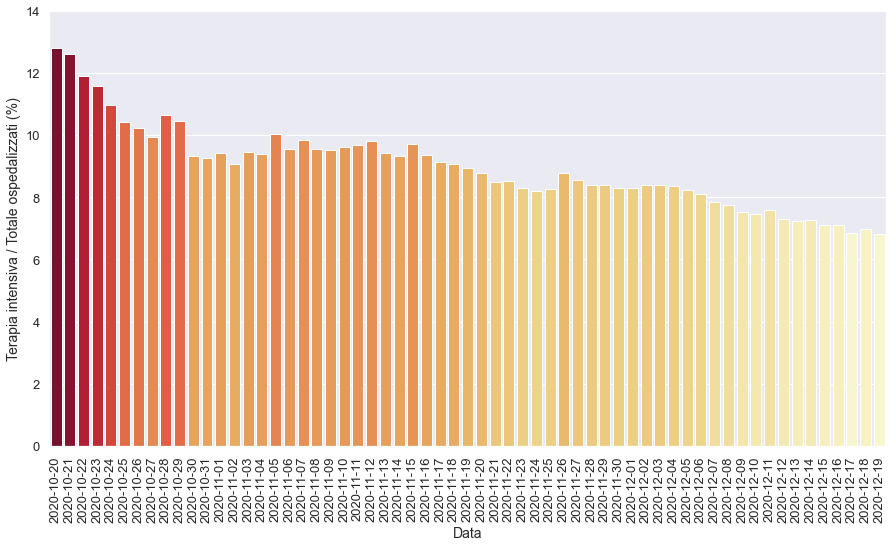

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

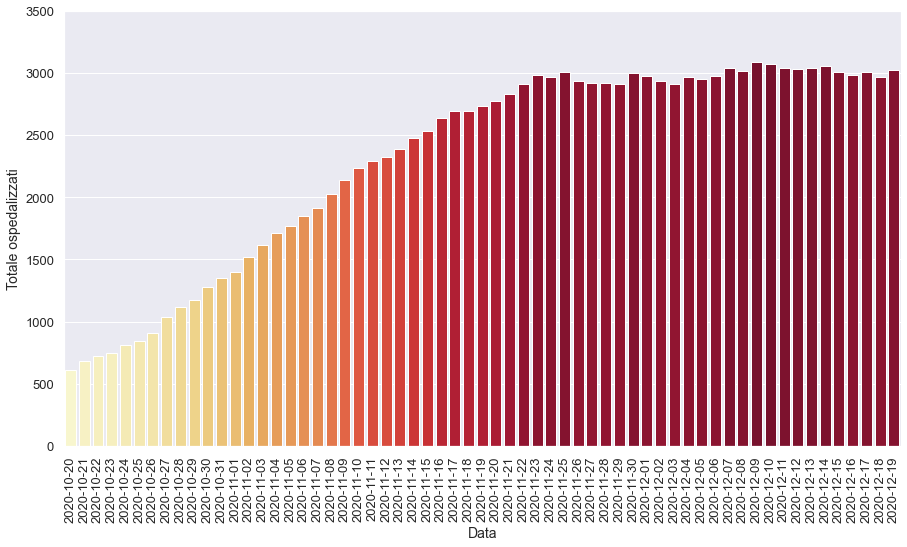

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

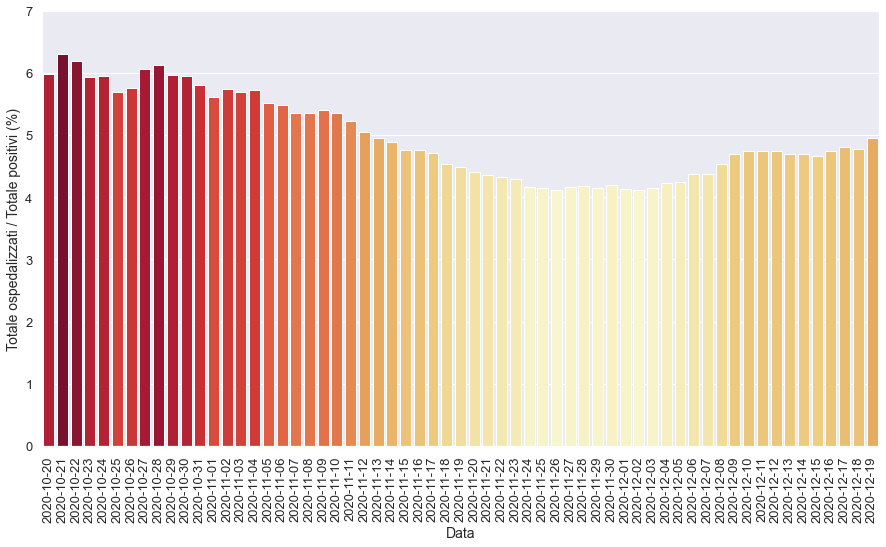

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

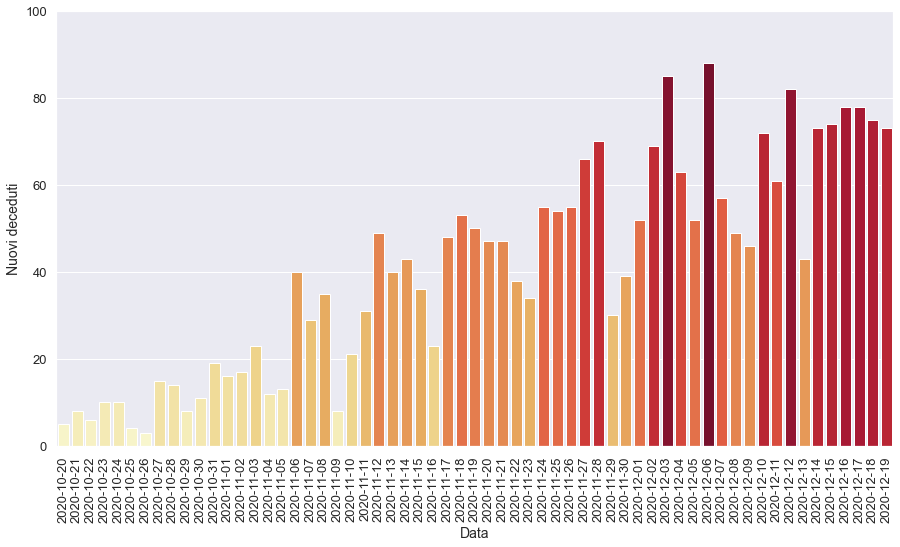

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

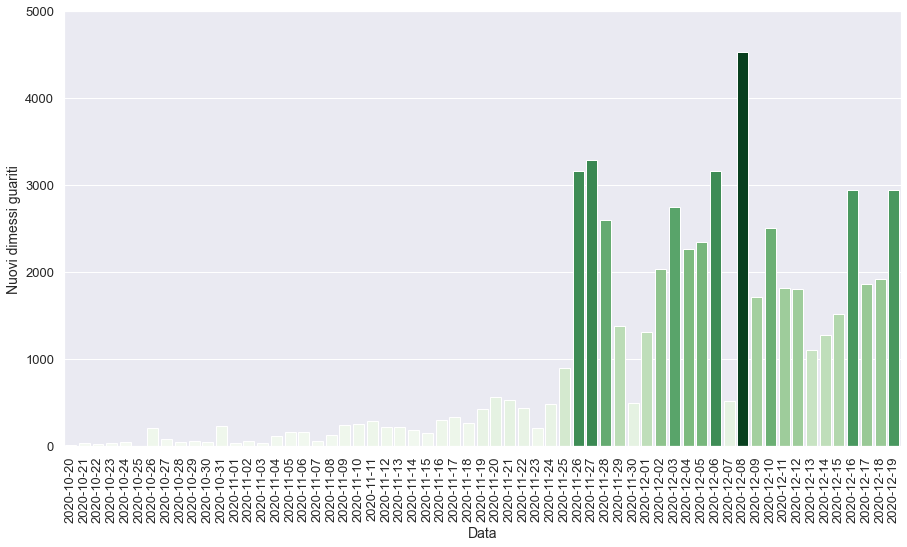

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-19T17:00:00,8,Emilia-Romagna,2489,244,2733,58276,61009,1690,2160,...,50.0,18930.0,7937.0,1650.0,8.93,4.48,11.41,27.21,0.00,2.85
1,2020-11-20T17:00:00,8,Emilia-Romagna,2534,244,2778,60156,62934,1925,2533,...,47.0,22307.0,8449.0,1880.0,8.78,4.41,11.36,29.98,0.00,3.16
2,2020-11-21T17:00:00,8,Emilia-Romagna,2594,241,2835,62245,65080,2146,2723,...,47.0,19697.0,7971.0,2089.0,8.50,4.36,13.82,34.16,-1.23,3.41
3,2020-11-22T17:00:00,8,Emilia-Romagna,2666,249,2915,64359,67274,2194,2665,...,38.0,13114.0,7468.0,2114.0,8.54,4.33,20.32,35.69,3.32,3.37
4,2020-11-23T17:00:00,8,Emilia-Romagna,2738,248,2986,66394,69380,2106,2347,...,34.0,11558.0,6417.0,2035.0,8.31,4.30,20.31,36.57,-0.40,3.13
5,2020-11-24T17:00:00,8,Emilia-Romagna,2723,243,2966,68378,71344,1964,2501,...,55.0,19602.0,7671.0,1984.0,8.19,4.16,12.76,32.60,-2.02,2.83
6,2020-11-25T17:00:00,8,Emilia-Romagna,2763,249,3012,69514,72526,1182,2130,...,54.0,18498.0,7342.0,1136.0,8.27,4.15,11.51,29.01,2.47,1.66
7,2020-11-26T17:00:00,8,Emilia-Romagna,2679,258,2937,68535,71472,-1054,2157,...,55.0,17264.0,6319.0,-979.0,8.78,4.11,12.49,34.14,3.61,-1.45
8,2020-11-27T17:00:00,8,Emilia-Romagna,2673,250,2923,67366,70289,-1183,2165,...,66.0,21304.0,6853.0,-1169.0,8.55,4.16,10.16,31.59,-3.10,-1.66
9,2020-11-28T17:00:00,8,Emilia-Romagna,2673,245,2918,66865,69783,-506,2172,...,70.0,17241.0,6512.0,-501.0,8.40,4.18,12.60,33.35,-2.00,-0.72


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

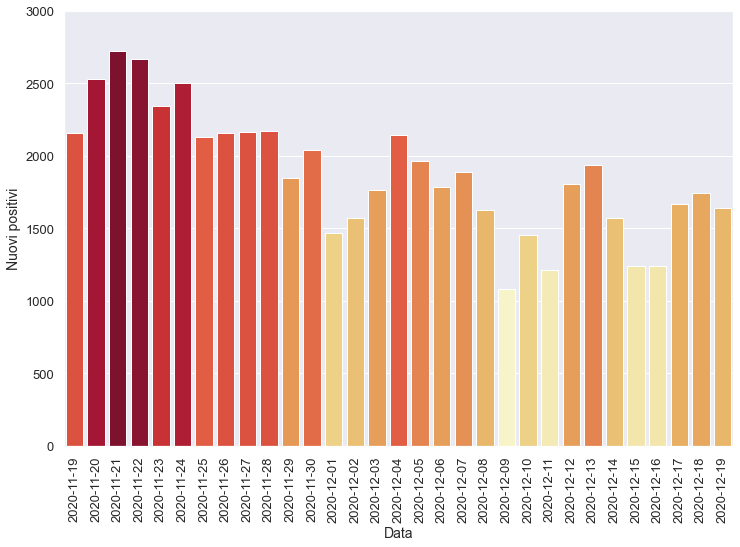

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

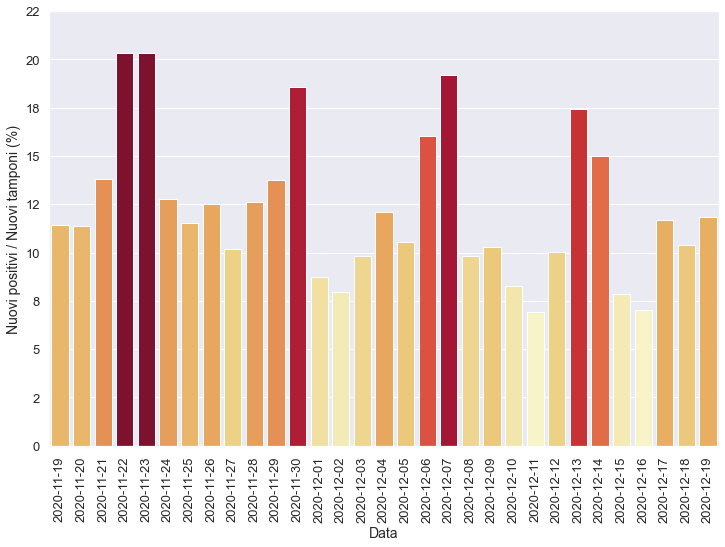

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

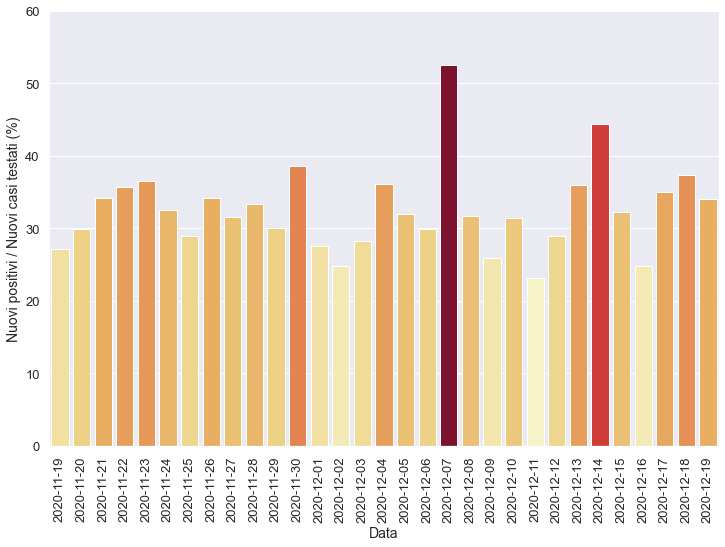

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

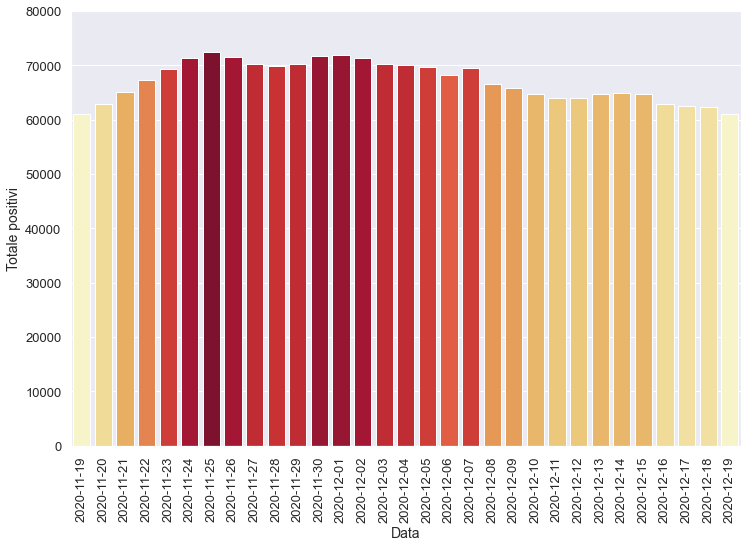

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

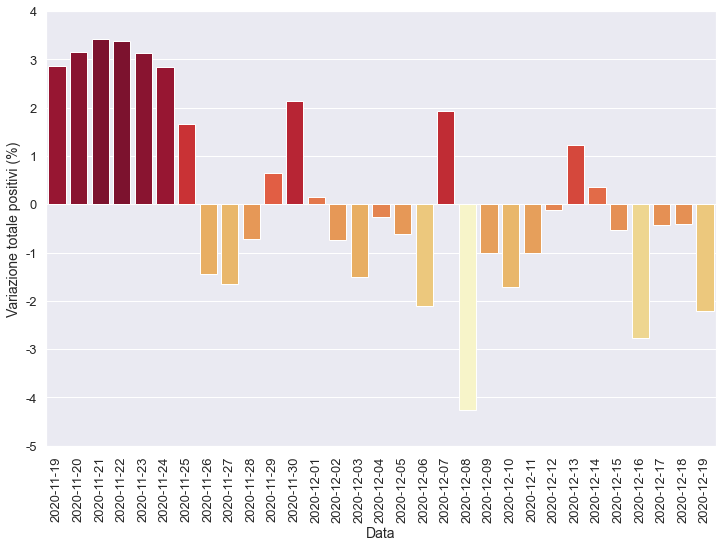

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

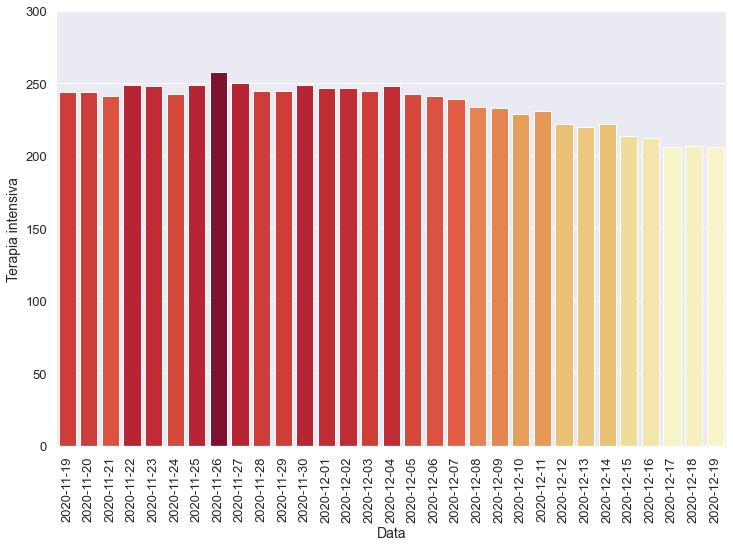

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

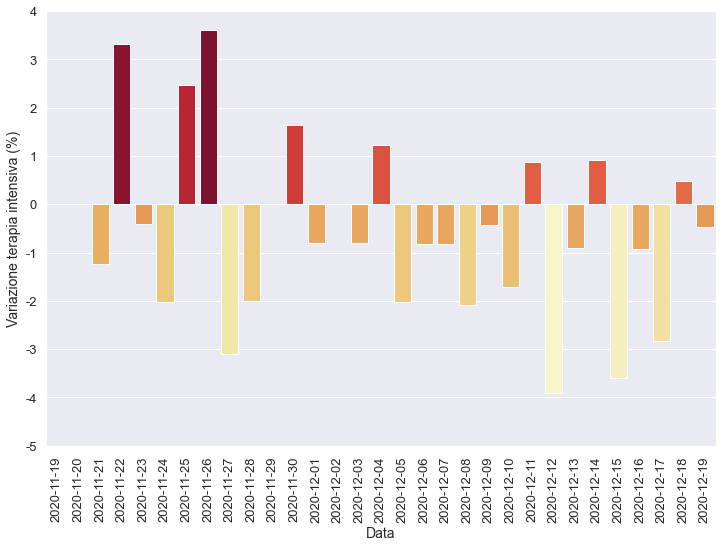

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

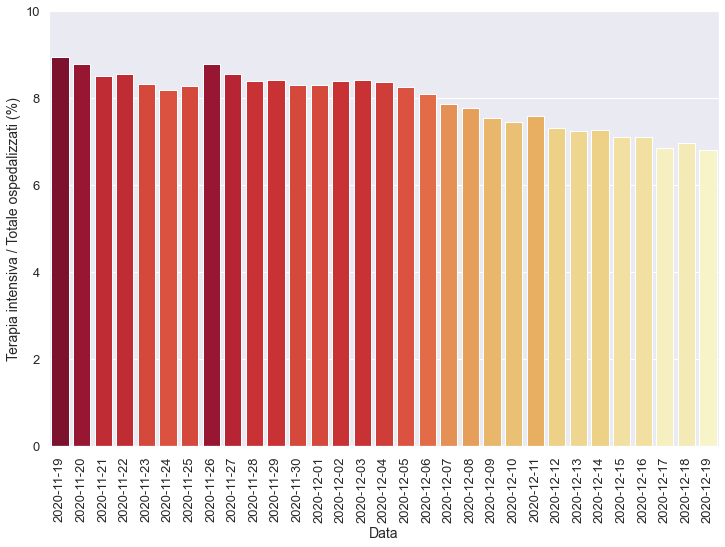

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

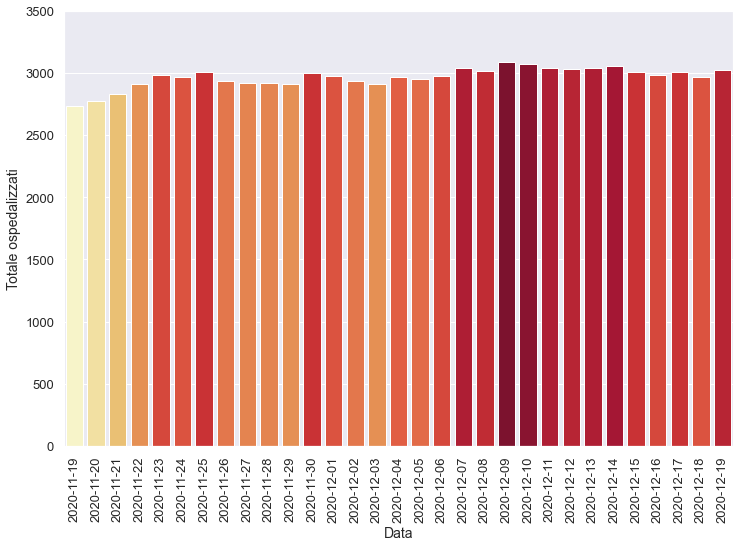

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

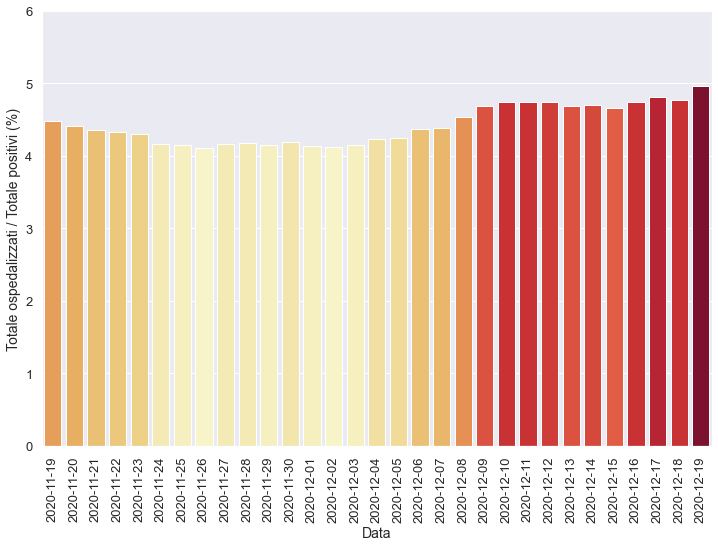

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

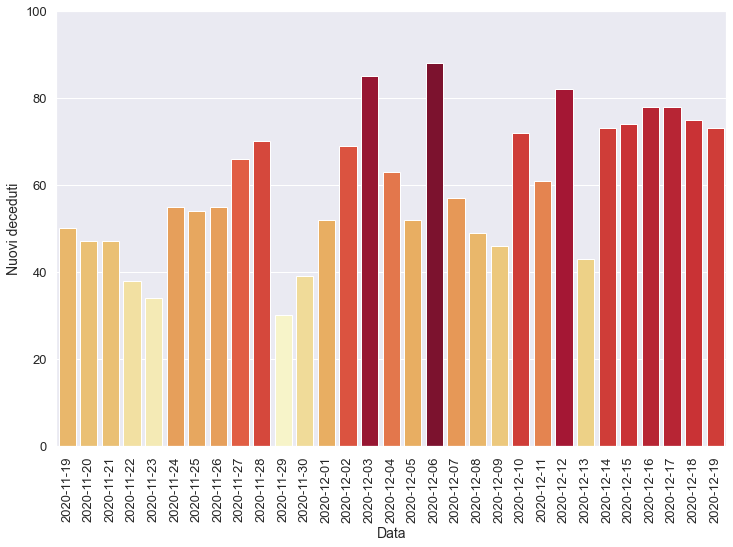

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

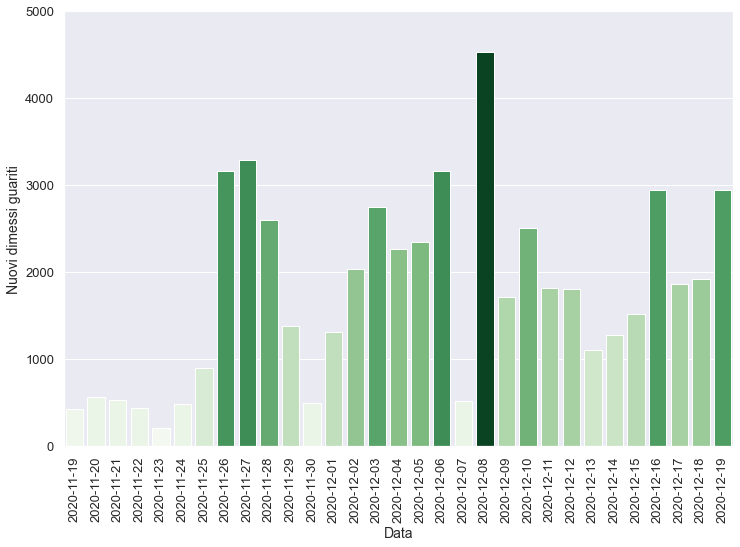

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-12T17:00:00,8,Emilia-Romagna,2813,222,3035,60937,63972,-83,1807,...,82.0,17975.0,6257.0,-75.0,7.31,4.74,10.05,28.88,-3.90,-0.13
1,2020-12-13T17:00:00,8,Emilia-Romagna,2819,220,3039,61723,64762,790,1940,...,43.0,11137.0,5392.0,786.0,7.24,4.69,17.42,35.98,-0.90,1.23
2,2020-12-14T17:00:00,8,Emilia-Romagna,2831,222,3053,61933,64986,224,1574,...,73.0,10517.0,3540.0,210.0,7.27,4.70,14.97,44.46,0.91,0.35
3,2020-12-15T17:00:00,8,Emilia-Romagna,2797,214,3011,61623,64634,-352,1238,...,74.0,15770.0,3838.0,-310.0,7.11,4.66,7.85,32.26,-3.60,-0.54
4,2020-12-16T17:00:00,8,Emilia-Romagna,2773,212,2985,59861,62846,-1788,1238,...,78.0,17567.0,4983.0,-1762.0,7.10,4.75,7.05,24.84,-0.93,-2.77
5,2020-12-17T17:00:00,8,Emilia-Romagna,2801,206,3007,59570,62577,-269,1667,...,78.0,14297.0,4758.0,-291.0,6.85,4.81,11.66,35.04,-2.83,-0.43
6,2020-12-18T17:00:00,8,Emilia-Romagna,2764,207,2971,59355,62326,-251,1745,...,75.0,16762.0,4662.0,-215.0,6.97,4.77,10.41,37.43,0.49,-0.40
7,2020-12-19T17:00:00,8,Emilia-Romagna,2819,206,3025,57924,60949,-1377,1641,...,73.0,13851.0,4814.0,-1431.0,6.81,4.96,11.85,34.09,-0.48,-2.21


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

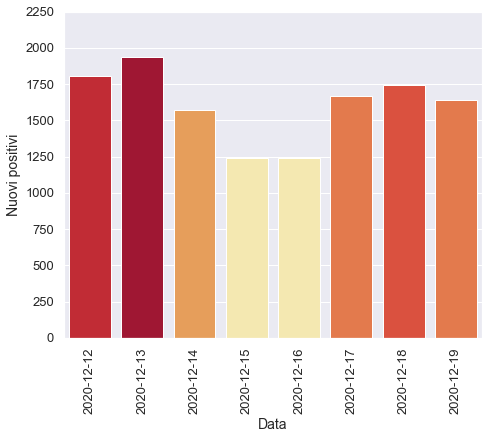

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

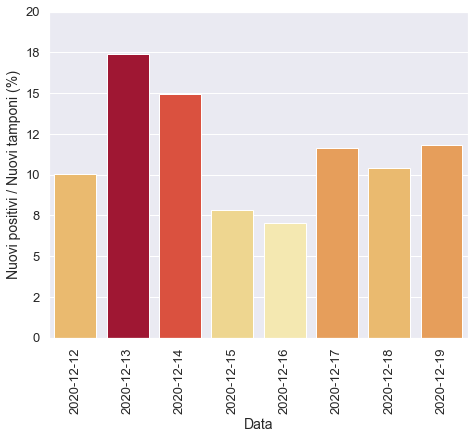

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

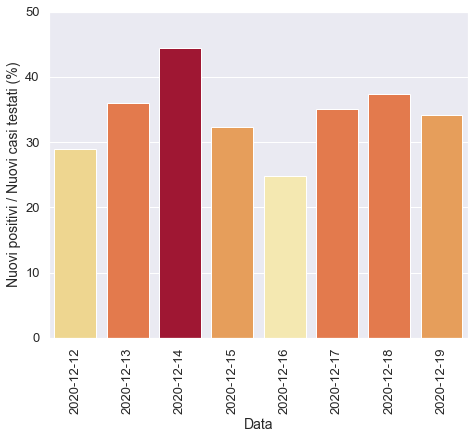

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

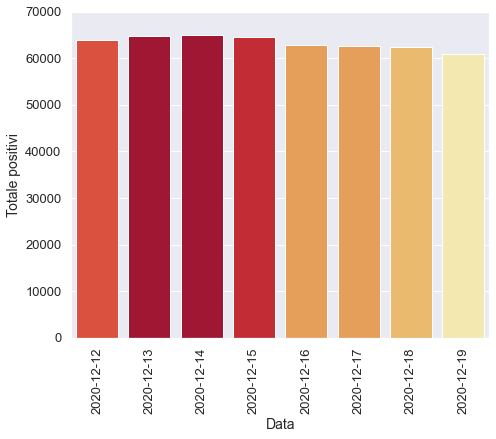

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

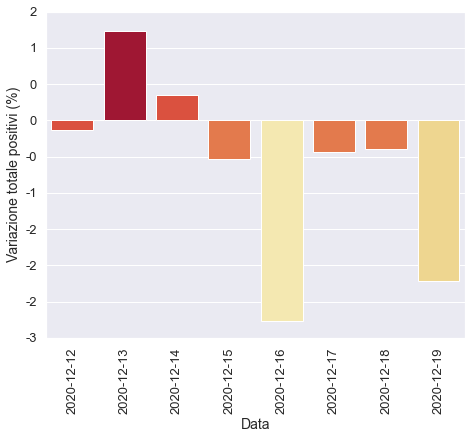

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

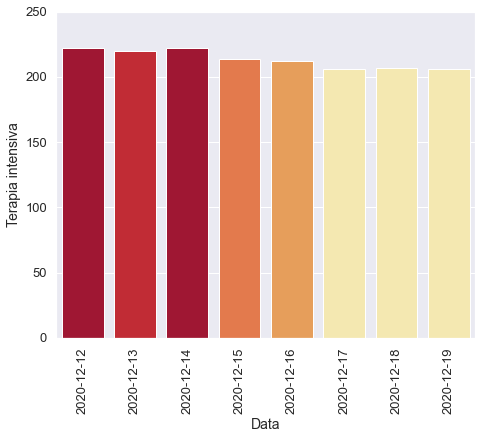

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

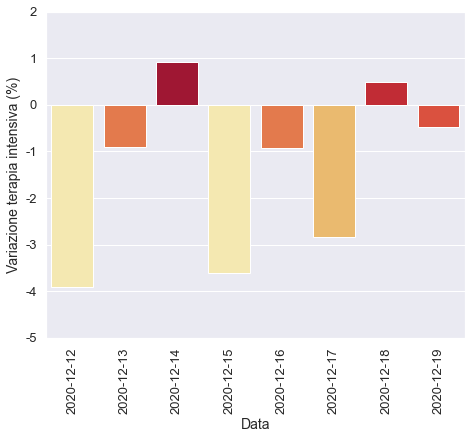

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

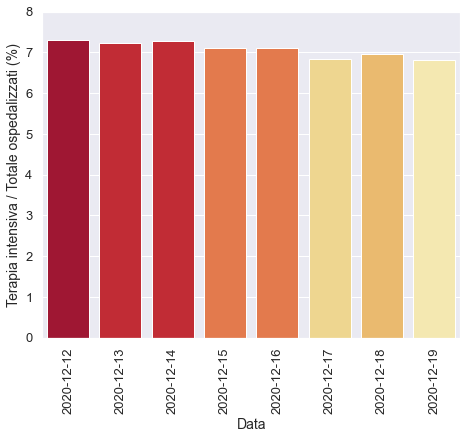

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

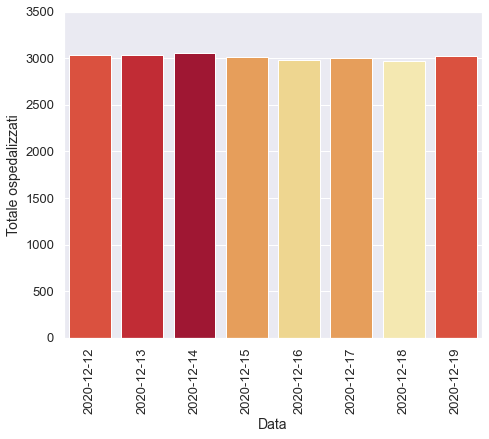

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

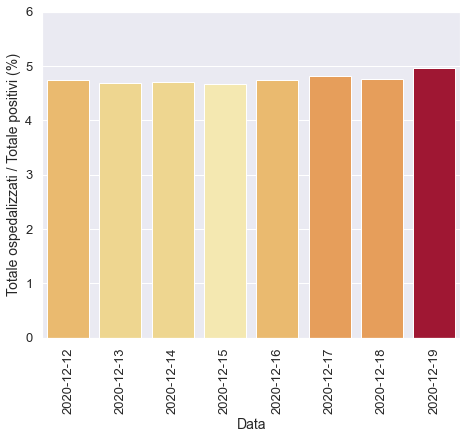

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

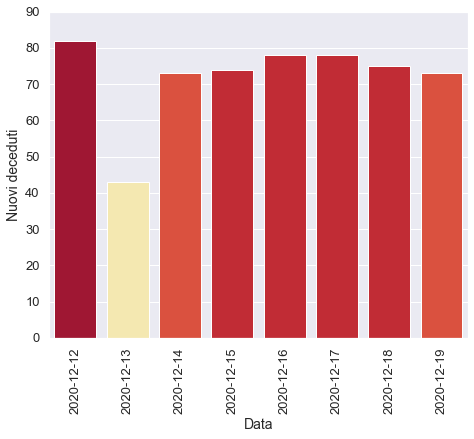

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

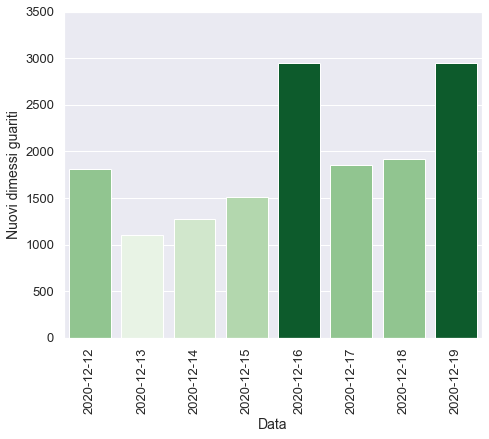

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)